# Chapter #4: Selecting the Best Model with Hyperparameter Tuning

In [1]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, KFold, cross_val_score, RandomizedSearchCV
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, make_scorer

## 1. Introduction to hyperparameter tuning

### 1.1. Creating Hyperparameters

For a school assignment, your professor has asked your class to create a random forest model to predict the average test score for the final exam.

After developing an initial random forest model, you are unsatisfied with the overall accuracy. You realize that there are too many hyperparameters to choose from, and each one has a lot of possible values. You have decided to make a list of possible ranges for the hyperparameters you might use in your next model.

Your professor has provided de-identified data for the last ten quizzes to act as the training data. There are 30 students in your class.

- Getting everything ready.

In [2]:
# Initiating the model:
rfr = RandomForestRegressor(random_state=1111)

- Print `.get_params()` in the console to review the possible parameters of the model that you can tune.

In [3]:
# Printing the model parameters:
print(rfr.get_params())

{'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 1111, 'verbose': 0, 'warm_start': False}


- Create a maximum depth list, `[4, 8, 12]` and a minimum samples list `[2, 5, 10]` that specify possible values for each hyperparameter.

In [4]:
# Creating a list for possible values of max_depth & min_samples_split:
max_depth = [4, 8, 12]
min_samples_split = [2, 5, 10]

- Create one final list to use for the maximum features.
> Use values 4 through the maximum number of features possible (10), by 2.

In [5]:
# Creating a list for possible values of max_features:
max_features = [4, 6, 8, 10]

### 1.2. Running a model using ranges

You have just finished creating a list of hyperparameters and ranges to use when tuning a predictive model for an assignment. You have used `max_depth`, `min_samples_split`, and `max_features` as your range variable names.

- Randomly select a max_depth, min_samples_split, and max_features using your range variables.

In [6]:
# Setting the default randon number generator:
randn_gen = np.random.default_rng(1111)

In [7]:
# Setting somerandom values for the hyperparameters in question:
rfr = RandomForestRegressor(n_estimators=100,
                            max_depth=randn_gen.choice(max_depth),
                            min_samples_split=randn_gen.choice(min_samples_split),
                            max_features=randn_gen.choice(max_features))

- Print out all of the parameters for rfr to see which values were randomly selected.

In [8]:
# Printing the model parameters:
print(rfr.get_params())

{'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': 12, 'max_features': 10, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 10, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


## 2.RandomizedSearchCV

### 2.1. Preparing for RandomizedSearch

Last semester your professor challenged your class to build a predictive model to predict final exam test scores. You tried running a few different models by randomly selecting hyperparameters. However, running each model required you to code it individually.

After learning about `RandomizedSearchCV()`, you're revisiting your professors challenge to build the best model. In this exercise, you will prepare the three necessary inputs for completing a random search.

- Finalize the parameter dictionary by adding a list for the max_depth parameter with options 2, 4, 6, and 8.

In [9]:
# Setting the param_dist dictionary:
param_dist = {"max_depth": [2, 4, 6, 8],
              "max_features": [2, 4, 6, 8, 10],
              "min_samples_split": [2, 4, 8, 16]}

- Create a random forest regression model with ten trees and a random_state of 1111.

In [10]:
# Initializing the model:
rfr = RandomForestRegressor(n_estimators=10, random_state=1111)

- Create a mean squared error scorer to use.

In [11]:
# Creating a scoring strategy:
scorer = make_scorer(mse, greater_is_better=False)

## 2.2. Implementing RandomizedSearchCV

You are hoping that using a random search algorithm will help you improve predictions for a class assignment. You professor has challenged your class to predict the overall final exam average score.

In preparation for completing a random search, you have created:

> - `param_dist`: the hyperparameter distributions
> - `rfr`: a random forest regression model
> -`scorer`: a scoring method to use

- Load the method for conducting a random search in `sklearn`.

> Done

- Complete a random search by filling in the parameters: `estimator`, `param_distributions`, and `scoring`.

- Use 5-fold cross validation for this random search.

In [12]:
# Setting the randomized search options:
random_search = RandomizedSearchCV(estimator=rfr,
                                   param_distributions=param_dist,
                                   scoring=scorer,
                                   cv=5, random_state=1111)

## 3. Selecting your final model

### 3.1. Best classification accuracy

You are in a competition at work to build the best model for predicting the winner of a Tic-Tac-Toe game. You already ran a random search and saved the results of the most accurate model to `rs`.

Which parameter set produces the best classification accuracy?

> `{'max_depth': 12, 'min_samples_split': 4, 'n_estimators': 20}`

### 3.2. Selecting the best precision model

Your boss has offered to pay for you to see three sports games this year. Of the 41 home games your favorite team plays, you want to ensure you go to three home games that they will definitely win. You build a model to decide which games your team will win.

To do this, you will build a random search algorithm and focus on model precision (to ensure your team wins). You also want to keep track of your best model and best parameters, so that you can use them again next year (if the model does well, of course). You have already decided on using the random forest classification model `rfc` and generated a parameter distribution `param_dist`.

- Getting everything ready.

> This data isn't available outside the workspace, so I will use the `tic_tic_toe` data instead.

In [13]:
# Reading the data:
tic_tac_toe = pd.read_csv("./data/tic-tac-toe.csv")

In [14]:
# Exploring the data shape:
tic_tac_toe.shape

(958, 10)

In [15]:
# Exploring the first 5 rows:
tic_tac_toe.head()

,Top-Left,Top-Middle,Top-Right,Middle-Left,Middle-Middle,Middle-Right,Bottom-Left,Bottom-Middle,Bottom-Right,Class
0,x,x,x,x,o,o,x,o,o,positive
1,x,x,x,x,o,o,o,x,o,positive
2,x,x,x,x,o,o,o,o,x,positive
3,x,x,x,x,o,o,o,b,b,positive
4,x,x,x,x,o,o,b,o,b,positive


In [16]:
# Encoding the target column into (0 / 1):
tic_tac_toe['Class'] = tic_tac_toe['Class'].apply(lambda x : 1 if x == 'positive' else 0)

In [17]:
# Encoding the feaatures into (0 / 1):
features = [col for col in tic_tac_toe.columns if col != 'Class']
tic_tac_toe = pd.get_dummies(data=tic_tac_toe, columns=features)

In [18]:
# defining a function to split the data into X & y:
def split_data(data, y_col):
    
    features = [col for col in data.columns if col != y_col]
    
    X = data[features].copy()
    y = data[y_col].copy()
    
    return X, y

In [19]:
# Slpitting the data into features matrix (X) & target column (y):
X, y = split_data(tic_tac_toe, 'Class')

In [20]:
# Splitting the data into training & hold-out sets:
X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size=0.2, stratify=y, random_state=1111)

In [21]:
# Initializing the model:
rfc = RandomForestClassifier(random_state=1111)

- Create a precision scorer, `precision` using `make_scorer(<scoring_function>)`.

In [22]:
# Creating a scoring strategy:
precision = make_scorer(precision_score)

- Complete the random search method by using `rfc` and param_dist.

In [23]:
# Initializing the RandomizedSearchCV object:
rs = RandomizedSearchCV(estimator=rfc,
                        param_distributions=param_dist,
                        scoring=precision,
                        cv=5, random_state=1111)

In [24]:
# Fitting the RandomizedSearchCV object:
rs.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=1111),
                   param_distributions={'max_depth': [2, 4, 6, 8],
                                        'max_features': [2, 4, 6, 8, 10],
                                        'min_samples_split': [2, 4, 8, 16]},
                   random_state=1111, scoring=make_scorer(precision_score))

- Use `rs.cv_results_` to print the mean test scores.

In [25]:
# Printing the mean test scores:
print(f"The score for each run was: {[round(s, 2) for s in rs.cv_results_['mean_test_score']]}.")

The score for each run was: [0.85, 0.78, 0.72, 0.93, 0.77, 0.9, 0.78, 0.9, 0.72, 0.97].


- Print the best overall score.

In [26]:
# Printing the best model score:
print(f"The best score for a single model was: {rs.best_score_:.2f}")

The best score for a single model was: 0.97


- Print the best parameters.

In [27]:
# Printing the best parameters:
print(f"The best parameters were: {rs.best_params_}")

The best parameters were: {'min_samples_split': 2, 'max_features': 8, 'max_depth': 8}


- Evaluate the best model performance on the hold-out data.

In [28]:
# Making predictions necessary for evaluating model performance:
y_pred = rs.best_estimator_.predict(X_test)

In [29]:
# Evaluating the model performance on the hold-out set:
best_model_precision = round(precision_score(y_test, y_pred), 2)
print(f"The precision score for the best model on hold-out set was: {best_model_precision}")

The precision score for the best model on hold-out set was: 0.98


- Explore the scores for different values of the model parameters:

In [30]:
# Making an array for each parameter values:
min_samples_split_array = [p['min_samples_split'] for p in rs.cv_results_['params']]
max_features_array = [p['max_features'] for p in rs.cv_results_['params']]
max_depth_array = [p['max_depth'] for p in rs.cv_results_['params']]

In [31]:
# Making an array of scores:
mean_scores = [round(s, 2) for s in rs.cv_results_['mean_test_score']]

In [32]:
# Organizing the model runs into a dataframe:
scores_df = pd.DataFrame({'min_samples_split': min_samples_split_array,
                          'max_features': max_features_array,
                          'max_depth': max_depth_array,
                          'scores': mean_scores})
scores_df.head()

,min_samples_split,max_features,max_depth,scores
0,8,6,6,0.85
1,16,10,4,0.78
2,16,10,2,0.72
3,8,10,6,0.93
4,4,8,4,0.77


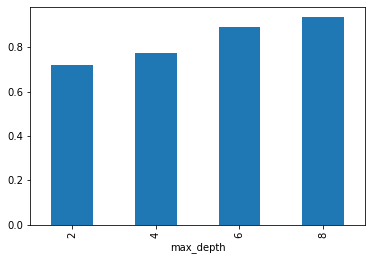

In [33]:
# Making inference about max_depth:
scores_df.groupby(by='max_depth')['scores'].mean().plot.bar();